In [243]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn import tree
import pydotplus
from IPython.display import Image

In [2]:
# Read in data, convert date column to datetime format, set date column as index
data = Path("Data/2_deep_learning/combined_data_df.csv")
data_df = pd.read_csv(data)
data_df['date'] = pd.to_datetime(data_df['date'])
data_df = data_df.set_index('date')
data_df.head()

,DJIA,DIJA_open,DIJA_high,DIJA_Low,DIJA_vol,DIJA_pct_change,NASDAQ,NASDAQ_open,NASDAQ_high,NASDAQ_low,...,BTC_low,BTC_vol,BTC_pct_change,GDP,CPI,IPI,UNEMP,NFP,IUC,FED
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,17148.94,17405.48,17405.48,16957.63,148060000.0,-1.58,4903.09,4897.65,4903.09,4846.98,...,427.0,13020.0,0.99,18382.82,237.80,102.88,4.9,143195.45,276142.86,4486600.57
2016-01-05,17158.66,17147.50,17195.84,17038.61,105750000.0,0.06,4891.43,4917.84,4926.73,4872.74,...,428.2,11220.0,-0.24,18383.82,237.79,102.86,4.9,143203.94,277714.29,4486603.29
2016-01-06,16906.51,17154.83,17154.83,16817.62,120250000.0,-1.47,4835.77,4813.76,4866.04,4804.69,...,425.0,8740.0,-0.89,18384.82,237.78,102.83,4.9,143212.42,279285.71,4486606.00
2016-01-07,16514.10,16888.36,16888.36,16463.63,176240000.0,-2.32,4689.43,4736.40,4788.02,4688.17,...,427.1,55660.0,7.26,18385.83,237.77,102.81,4.9,143220.90,280857.14,4488761.57
2016-01-08,16346.45,16519.17,16651.89,16314.57,141850000.0,-1.02,4643.63,4722.02,4742.57,4637.85,...,446.8,30450.0,-1.10,18386.83,237.76,102.79,4.9,143229.39,282428.57,4490917.14


In [3]:
# Move BTC column to the end
df1 = data_df.pop('BTC') # remove column b and store it in df1
data_df['BTC']=df1 # add b series as a 'new' column.
data_df.head()

,DJIA,DIJA_open,DIJA_high,DIJA_Low,DIJA_vol,DIJA_pct_change,NASDAQ,NASDAQ_open,NASDAQ_high,NASDAQ_low,...,BTC_vol,BTC_pct_change,GDP,CPI,IPI,UNEMP,NFP,IUC,FED,BTC
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,17148.94,17405.48,17405.48,16957.63,148060000.0,-1.58,4903.09,4897.65,4903.09,4846.98,...,13020.0,0.99,18382.82,237.80,102.88,4.9,143195.45,276142.86,4486600.57,432.9
2016-01-05,17158.66,17147.50,17195.84,17038.61,105750000.0,0.06,4891.43,4917.84,4926.73,4872.74,...,11220.0,-0.24,18383.82,237.79,102.86,4.9,143203.94,277714.29,4486603.29,431.8
2016-01-06,16906.51,17154.83,17154.83,16817.62,120250000.0,-1.47,4835.77,4813.76,4866.04,4804.69,...,8740.0,-0.89,18384.82,237.78,102.83,4.9,143212.42,279285.71,4486606.00,428.0
2016-01-07,16514.10,16888.36,16888.36,16463.63,176240000.0,-2.32,4689.43,4736.40,4788.02,4688.17,...,55660.0,7.26,18385.83,237.77,102.81,4.9,143220.90,280857.14,4488761.57,459.0
2016-01-08,16346.45,16519.17,16651.89,16314.57,141850000.0,-1.02,4643.63,4722.02,4742.57,4637.85,...,30450.0,-1.10,18386.83,237.76,102.79,4.9,143229.39,282428.57,4490917.14,454.0


In [ ]:
#Make a list of all of the columns in the dataframe and get the total number of columns
cols = list(data_df.columns.values)
len(cols)

# Linear Regression, Gradient Boosting Regression, & Deep Tree Regression with K-Fold Cross-Validation

In [260]:
# Create the features (X) and target (y) sets
X = data_df.iloc[:, 0:61].values
y = data_df["BTC"].values.reshape(-1,1)
X

array([[1.7148940e+04, 1.7405480e+04, 1.7405480e+04, ..., 4.9000000e+00,
        1.4319545e+05, 2.7614286e+05],
       [1.7158660e+04, 1.7147500e+04, 1.7195840e+04, ..., 4.9000000e+00,
        1.4320394e+05, 2.7771429e+05],
       [1.6906510e+04, 1.7154830e+04, 1.7154830e+04, ..., 4.9000000e+00,
        1.4321242e+05, 2.7928571e+05],
       ...,
       [2.5402380e+04, 2.5315530e+04, 2.5614660e+04, ..., 1.0290000e+01,
        1.3940570e+05, 1.3940000e+06],
       [2.5595800e+04, 2.5152450e+04, 2.5601150e+04, ..., 1.0260000e+01,
        1.3946447e+05, 1.3800000e+06],
       [2.5812880e+04, 2.5512430e+04, 2.5905380e+04, ..., 1.0230000e+01,
        1.3952323e+05, 1.3660000e+06]])

In [261]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [265]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [266]:
# Fitting Standard Scaler
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)


In [267]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [187]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model_gbooster = GradientBoostingRegressor(n_estimators=100,
                                            learning_rate=learning_rate,
                                            max_features=61,
                                            max_depth=3,
                                            random_state=1)

    # Fit the model
    model_gbooster.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        model_gbooster.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model_gbooster.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.998

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.999

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.998

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.996

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.995

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.992



In [271]:
# Choose a learning rate and create classifier
model_gbooster = GradientBoostingRegressor(n_estimators=100,
                                            learning_rate=0.1,
                                            max_features=61,
                                            max_depth=5,
                                            random_state=1)

# Fit the model
model_gbooster.fit(X_train_scaled, y_train.ravel())

# Make Prediction
gbooster_predictions = model_gbooster.predict(X_test_scaled)
Results_gbooster=pd.DataFrame({"Prediction": gbooster_predictions, "Actual": y_test.ravel()})
Results_gbooster

,Prediction,Actual
0,713.485730,705.9
1,732.772527,731.0
2,695.296653,688.7
3,14634.508359,14709.8
4,574.850672,572.7
...,...,...
405,1436.520397,1423.6
406,449.440008,450.4
407,3671.940537,3749.3
408,2345.028556,2329.0


In [255]:
gbooster_mean_squared_error = mean_squared_error(y_test.ravel(), gbooster_predictions)
print(f"Mean Squared Error : {gbooster_mean_squared_error}")

Mean Squared Error : 22368.47688672606


In [256]:
gbooster_mse = mean_squared_error(
    Results_gbooster["Prediction"],
    Results_gbooster["Actual"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(gbooster_mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 149.56094706415195


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000244037FFB88>,
      dtype=object)

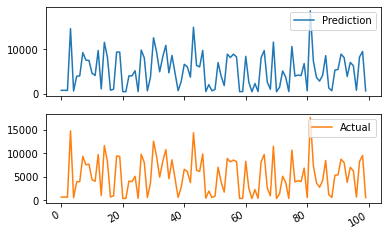

In [258]:
Results_gbooster[:100].plot(subplots=True)

In [220]:
# Train the Linear Regression model using the resampled data
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train.ravel())

LinearRegression()

In [221]:
# Fit the model
model_lr.fit(X_train_scaled, y_train.ravel())

LinearRegression()

In [270]:
lr_predictions = model_lr.predict(X_test_scaled)
Results_lr=pd.DataFrame({"Prediction": lr_predictions, "Actual": y_test.ravel()})
Results_lr

,Prediction,Actual
0,781.496491,705.9
1,731.550750,731.0
2,690.679401,688.7
3,14509.742143,14709.8
4,556.263545,572.7
...,...,...
405,1412.447644,1423.6
406,492.890131,450.4
407,3793.659608,3749.3
408,2305.870888,2329.0


In [223]:
lr_mean_squared_error = mean_squared_error(y_test.ravel(), lr_predictions)
print(f"Mean Squared Error : {lr_mean_squared_error}")

Mean Squared Error : 12245.602329009416


In [245]:
lr_mse = mean_squared_error(
    Results_lr["Prediction"],
    Results_lr["Actual"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(lr_mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 95.94706143336633


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024404D96D48>,
      dtype=object)

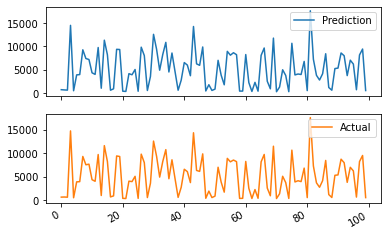

In [281]:
Results_lr[:100].plot(subplots=True)

In [212]:
# define model
dtr_model = DecisionTreeRegressor(random_state=1)

# define the evaluation procedure
cv = RepeatedKFold(n_splits=200, n_repeats=40, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(dtr_model, X_train_scaled, y_train.ravel(), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 117.687 (91.078)


In [208]:
#dtr_model.fit(X_train_scaled, y_train.ravel())

In [209]:
dtr_predictions = dtr_model.predict(X_test_scaled)

In [272]:
Results_dtr=pd.DataFrame({"Prediction": dtr_predictions, "Actual": y_test.ravel()})
Results_dtr

,Prediction,Actual
0,671.0,705.9
1,731.2,731.0
2,693.5,688.7
3,13800.0,14709.8
4,576.2,572.7
...,...,...
405,1435.2,1423.6
406,446.6,450.4
407,3639.1,3749.3
408,2249.3,2329.0


In [211]:
dtr_mean_squared_error = mean_squared_error(y_test.ravel(), dtr_predictions)
print(f"Mean Squared Error : {dtr_mean_squared_error}")

Mean Squared Error : 63760.011097560986


In [250]:
dtr_mse = mean_squared_error(
    Results_dtr["Prediction"],
    Results_dtr["Actual"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(dtr_mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 243.07426437202255


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000244049CD4C8>,
      dtype=object)

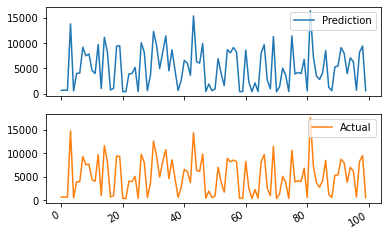

In [275]:
Results_dtr[:100].plot(subplots=True)